In [1]:
filename='donateacry_corpus_cleaned_and_updated_data\\burping\\79FF400A-97E2-4701-987D-C7C850D5523C-1430089648-1.0-f-48-bu.wav'
f2 = "donateacry_corpus_cleaned_and_updated_data\\belly_pain\\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav"

In [2]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(f2)

In [3]:
len(wave_audio)

56000

In [4]:
# df.drop("File",axis=1)

In [5]:
import os
import pandas as pd
import librosa

import numpy as np
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA

def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        audio_files.extend(get_audio_files(subfolder))
        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features

        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df

# def process_audio_files(audio_files, subfolder_names, n_components):
#     data = []

#     for audio_file, subfolder_name in zip(audio_files, subfolder_names):
#         wave_sample_rate, wave_audio = wav.read(audio_file)  # Read audio file
#         compressed_data = compress_audio_pca(wave_audio, n_components)  # Apply PCA

#         data.append([audio_file, compressed_data, subfolder_name])

#     df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
#     return df

def compress_audio_pca(audio_data, n_components):
    # Reshape audio data to a 2D array
    audio_data_2d = audio_data.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)

    # Restore the compressed data to its original shape
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data

# Example usage
subfolders = ['donateacry_corpus_cleaned_and_updated_data\\belly_pain',
              'donateacry_corpus_cleaned_and_updated_data\\burping',
              'donateacry_corpus_cleaned_and_updated_data\\discomfort',
              'donateacry_corpus_cleaned_and_updated_data\\hungry',
              'donateacry_corpus_cleaned_and_updated_data\\tired']

n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

                                                  File  \
0    donateacry_corpus_cleaned_and_updated_data\bel...   
1    donateacry_corpus_cleaned_and_updated_data\bel...   
2    donateacry_corpus_cleaned_and_updated_data\bel...   
3    donateacry_corpus_cleaned_and_updated_data\bel...   
4    donateacry_corpus_cleaned_and_updated_data\bel...   
..                                                 ...   
452  donateacry_corpus_cleaned_and_updated_data\tir...   
453  donateacry_corpus_cleaned_and_updated_data\tir...   
454  donateacry_corpus_cleaned_and_updated_data\tir...   
455  donateacry_corpus_cleaned_and_updated_data\tir...   
456  donateacry_corpus_cleaned_and_updated_data\tir...   

                                       Compressed Data Subfolder Name  
0    [-503.241, 155.62462, -53.089634, -9.338754, 1...     belly_pain  
1    [-426.70706, 157.33188, -52.70598, -14.5242, 1...     belly_pain  
2    [-389.0387, 168.44524, -67.223175, -17.126299,...     belly_pain  
3    [-317.4329

In [16]:
# # plt.plot(raw_data_lengths, label='Before Preprocessing')
# plt.plot(compressed_data_lengths, label='After Preprocessing')
# plt.xlabel('Audio File Index')
# plt.ylabel('Length of Data')
# plt.title('Length of Data Before and After Preprocessing')
# plt.legend()
# plt.show()

In [7]:
df = df.drop("File",axis=1)

In [8]:
data = df.to_csv("Audio_data.csv")

In [9]:
df.head()

,Compressed Data,Subfolder Name
0,"[-503.241, 155.62462, -53.089634, -9.338754, 1...",belly_pain
1,"[-426.70706, 157.33188, -52.70598, -14.5242, 1...",belly_pain
2,"[-389.0387, 168.44524, -67.223175, -17.126299,...",belly_pain
3,"[-317.4329, 176.0357, -62.427364, -4.4671364, ...",belly_pain
4,"[-389.52472, 148.90518, -72.82749, -8.710933, ...",belly_pain


In [10]:
df.shape

(457, 2)

In [11]:
for i in range(457):

    df["shape"] = len(df["Compressed Data"][i])
df.head()

,Compressed Data,Subfolder Name,shape
0,"[-503.241, 155.62462, -53.089634, -9.338754, 1...",belly_pain,40
1,"[-426.70706, 157.33188, -52.70598, -14.5242, 1...",belly_pain,40
2,"[-389.0387, 168.44524, -67.223175, -17.126299,...",belly_pain,40
3,"[-317.4329, 176.0357, -62.427364, -4.4671364, ...",belly_pain,40
4,"[-389.52472, 148.90518, -72.82749, -8.710933, ...",belly_pain,40


In [12]:
len(df["Compressed Data"][0])

40

In [13]:
li = []
for i in df["shape"]:
    li.append(i)

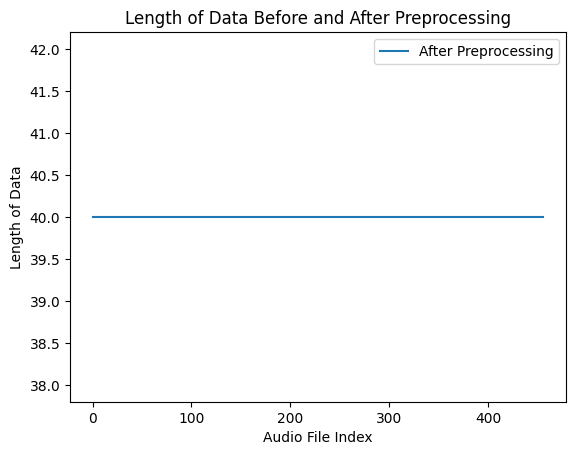

In [17]:
# plt.plot(raw_data_lengths, label='Before Preprocessing')
import matplotlib.pyplot as plt
plt.plot(li, label='After Preprocessing')
plt.xlabel('Audio File Index')
plt.ylabel('Length of Data')
plt.title('Length of Data Before and After Preprocessing')
plt.legend()
plt.show()

In [12]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class,shape
0,"[0.6385357142791819, -10.361464285714284, 33.6...",belly_pain,55040
1,"[37.665482142842414, 28.665482142857144, -50.3...",belly_pain,55040
2,"[-12.807250000004082, -1.8072499999999998, 147...",belly_pain,55040
3,"[-118.26333928573973, 130.7366607142857, -233....",belly_pain,55040
4,"[-53.50898214283982, 47.49101785714286, 38.491...",belly_pain,55040


In [13]:
df.shape

(457, 3)

[]

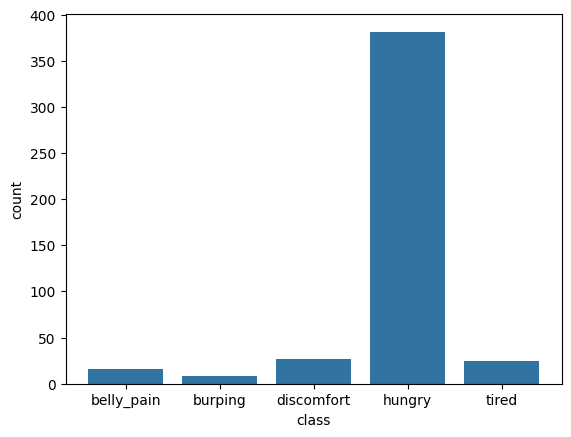

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="class",data=df)
plt.plot()

In [18]:
x = df["Compressed Data"]
y=df["class"]
x.shape

(457,)

In [19]:
from imblearn.over_sampling import RandomOverSampler
resamp = RandomOverSampler()
x = x.to_numpy()
x=x.reshape(-1,1)
x,y=resamp.fit_resample(x,y)

[]

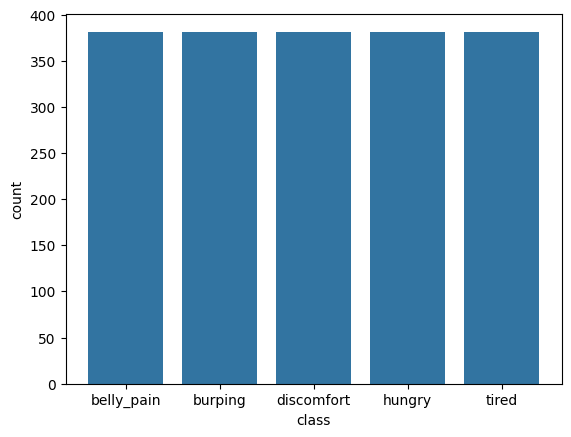

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y,data=df)
plt.plot()

In [21]:
x.shape

(1910, 1)

In [22]:
data = {'Data': x, 'class': y}

In [23]:
# x = x.reshape(1,-1)

In [24]:
len(x[0][0])

40

In [25]:
df = pd.DataFrame(x,columns=["Data"])
df["class"]=y
df["class"].value_counts()

class
belly_pain    382
burping       382
discomfort    382
hungry        382
tired         382
Name: count, dtype: int64

In [26]:
df.head()

,Data,class
0,"[-503.241, 155.62462, -53.089634, -9.338754, 1...",belly_pain
1,"[-426.70706, 157.33188, -52.70598, -14.5242, 1...",belly_pain
2,"[-389.0387, 168.44524, -67.223175, -17.126299,...",belly_pain
3,"[-317.4329, 176.0357, -62.427364, -4.4671364, ...",belly_pain
4,"[-389.52472, 148.90518, -72.82749, -8.710933, ...",belly_pain


In [27]:
df_new = df["Data"].apply(pd.Series)
df_result = pd.concat([df, df_new], axis=1)
df_result = df_result.drop('Data', axis=1)
df_result.head()

C:\Users\gagan\AppData\Local\Temp\ipykernel_18440\1629959254.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_new = df["Data"].apply(pd.Series)


,class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,belly_pain,-503.240997,155.624619,-53.089634,-9.338754,18.954021,-30.361128,-10.490327,-0.191979,-25.778473,...,0.319254,-1.159282,-5.115258,-1.217770,0.125908,-1.005656,0.573103,1.187625,3.673102,5.454000
1,belly_pain,-426.707062,157.331879,-52.705978,-14.524200,11.352674,-37.552837,-15.138313,0.320166,-24.708115,...,-2.655442,-1.795501,-2.781284,-0.339015,-0.960696,-2.035474,-0.726631,-2.245474,-2.666178,-0.223122
2,belly_pain,-389.038696,168.445236,-67.223175,-17.126299,13.631199,-41.452286,-14.523580,-1.005277,-31.239031,...,2.359671,2.486675,0.891681,3.970485,1.110400,-1.227666,0.690895,-1.282442,-0.621610,2.109241
3,belly_pain,-317.432892,176.035706,-62.427364,-4.467136,17.833765,-48.702007,-19.136120,-3.011306,-32.136478,...,4.420218,2.126175,1.675153,5.267370,0.063184,-1.355639,2.513360,-0.295119,-0.607795,1.403075
4,belly_pain,-389.524719,148.905182,-72.827492,-8.710933,16.210020,-44.576469,-8.785514,8.607780,-25.924629,...,1.054672,-2.449713,-3.605605,1.300901,-0.568031,-1.723946,1.818141,1.110664,0.178261,0.663461


In [28]:
x = df_result.drop("class",axis=1)
y=df_result["class"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import f1_score,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
DT= DecisionTreeClassifier()
X_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
111,-317.277222,177.901627,-59.410362,-3.864167,23.679174,-45.472404,-22.496149,0.291028,-28.159981,-14.415143,...,1.074869,2.412574,-0.400307,1.431415,-1.477698,-2.946742,0.831659,-0.962104,-1.472856,2.960368
481,-402.055145,153.389954,-106.980034,-21.820835,25.608883,-38.460129,1.304660,20.323942,-27.275318,-7.492633,...,-1.519564,-0.294574,-0.964432,2.116224,0.412925,-0.575138,2.065878,-1.443321,-3.860727,-0.361463
1104,-250.580811,124.703926,-95.407623,-15.318602,26.263529,-31.501701,2.989163,20.561798,-20.940310,-7.332083,...,1.851211,1.334153,0.123672,1.275021,-0.858931,-0.536919,1.286389,-0.172196,1.453737,3.089153
272,-335.887665,97.573418,-61.719902,-32.464954,13.372377,-8.522899,-7.993786,-0.545505,-7.565622,1.722517,...,-1.171402,-1.832527,-2.110293,1.858204,3.416331,1.558038,1.901510,1.678401,-0.270216,-0.875986
185,-447.279327,114.341240,-31.250498,1.838682,11.700463,-30.999470,-7.197795,6.622939,-19.868307,-9.345428,...,1.696849,-0.538343,-1.597317,0.539697,1.254790,2.329929,3.481561,2.998636,3.416906,1.959687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,-381.117310,180.048340,-85.442490,2.491761,30.826580,-40.599998,6.848402,18.403595,-23.991930,6.995348,...,2.594790,-2.448665,-2.737767,1.856164,-0.771071,0.450685,2.883976,-0.709386,0.194756,0.514253
1608,-436.262054,127.123055,-39.831596,-5.720747,21.612703,-21.283779,-9.827358,6.232163,-14.558554,-9.414278,...,-0.956549,4.130469,2.784811,0.060035,-0.451087,-0.996341,-2.702762,-3.767781,-1.986203,-0.684325
493,-317.432892,176.035706,-62.427364,-4.467136,17.833765,-48.702007,-19.136120,-3.011306,-32.136478,-8.081997,...,4.420218,2.126175,1.675153,5.267370,0.063184,-1.355639,2.513360,-0.295119,-0.607795,1.403075
527,-395.502747,134.505417,-40.998844,-3.851706,10.750525,-36.928837,-15.562063,-5.356579,-29.510025,-12.537199,...,0.759146,0.411946,-1.037288,2.146250,0.676931,-0.602084,1.970804,0.503776,-0.253919,1.737532


In [30]:
DT.fit(X_train,y_train)


DecisionTreeClassifier()

In [31]:
pred=DT.predict(X_test)
print(accuracy_score(y_test,pred))


0.9528795811518325


In [34]:
# hive = "donateacry_corpus_cleaned_and_updated_data\\tired\\7A22229D-06C2-4AAA-9674-DE5DF1906B3A-1436891944-1.1-m-72-ti.wav"
# new="donateacry_corpus_cleaned_and_updated_data\\discomfort\\665BDF6D-2897-49F9-8AD0-978B3B2A0468-1430530218-1.0-m-26-dc.wav"
# burp= "donateacry_corpus_cleaned_and_updated_data\\burping\\F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav"
# new_audio_file = "donateacry_corpus_cleaned_and_updated_data\\hungry\\0a983cd2-0078-4698-a048-99ac01eb167a-1433917038889-1.7-f-04-hu.wav"
# new_audio_features = features_extractor(burp)
# # new_audio_features_2d = new_audio_features.reshape(1, -1)
# # new_audio_features.shape
# # # new_pre =pd.DataFrame(new_audio_features_2d)
# # pred=DT.predict(new_pre)
# # pred

C:\Users\gagan\AppData\Local\Temp\ipykernel_18440\1702381163.py:31: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')


FileNotFoundError: [Errno 2] No such file or directory: 'donateacry_corpus_cleaned_and_updated_data\\burping\\F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'

In [36]:
# new_audio_features = features_extractor(burp)
# new_audio_features_2d = new_audio_features.reshape(1, -1)
# new_pre =pd.DataFrame(new_audio_features_2d)
# pred=DT.predict(new_pre)
# pred

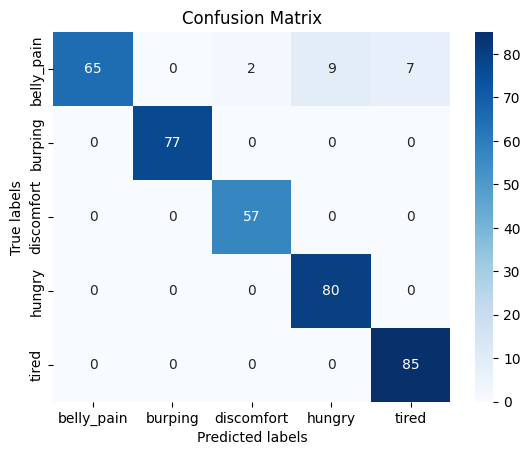

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have class labels defined as a list
class_labels = ["belly_pain", "burping", "discomfort", "hungry", "tired"]

conf_matrix = confusion_matrix(y_test, pred)

# Plotting the confusion matrix with class labels
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


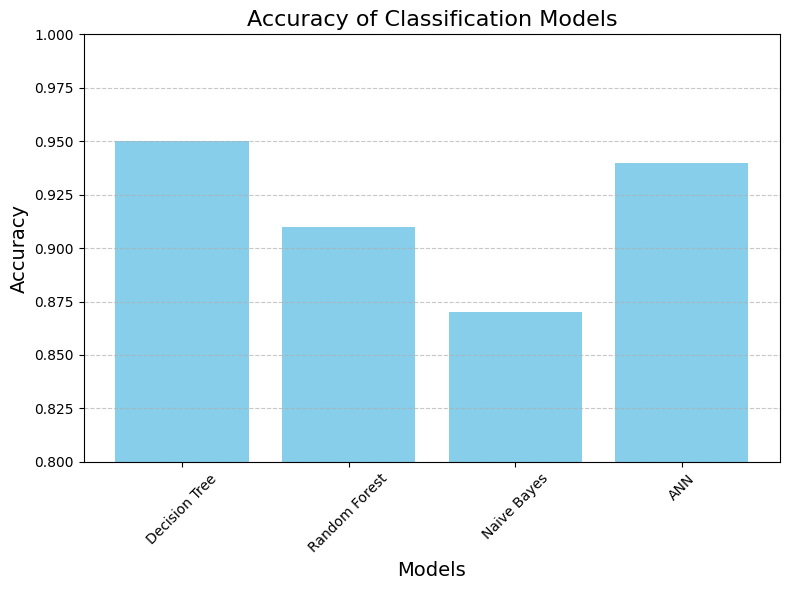

In [48]:
import matplotlib.pyplot as plt

# Models and their corresponding accuracies
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'ANN']
accuracies = [0.95, 0.91, 0.87, 0.94]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Classification Models', fontsize=16)
plt.ylim(0.8, 1.0)  # Adjust y-axis limits if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


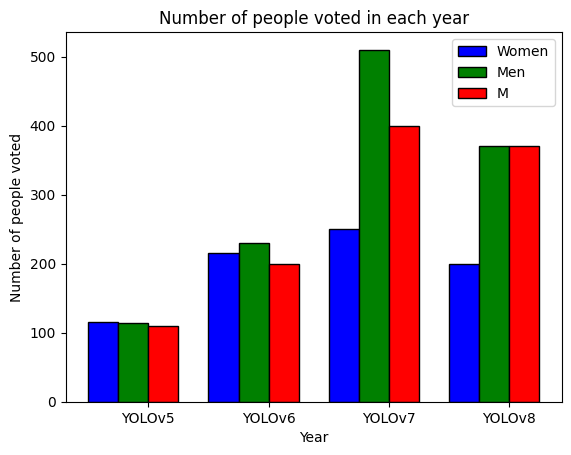

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Women = [115, 215, 250, 200]
Men = [114, 230, 510, 370]
M = [110, 200, 400, 370]
n = 4
r = np.arange(n)
width = 0.25

plt.bar(r, Women, color='b', width=width, edgecolor='black', label='Women')
plt.bar(r + width, Men, color='g', width=width, edgecolor='black', label='Men')
plt.bar(r + 2*width, M, color='r', width=width, edgecolor='black', label='M')  # Adjusted x-coordinate

plt.xlabel("Year")
plt.ylabel("Number of people voted")
plt.title("Number of people voted in each year")

plt.xticks(r + width + width/2, ['YOLOv5', 'YOLOv6', 'YOLOv7', 'YOLOv8'])  # Adjusted x-ticks
plt.legend()

plt.show()


In [38]:
def mm(ss):
    dd = {"hungry":0,"belly_pain":1,"burping":2,"discomfort":3,"tired":4}
    for i in dd:
        if i == ss:
            ss = dd[i]
    return ss
# y_train=y_train.apply(mm)
y_test = y_test.apply(mm)

In [39]:
dd = {"hungry":0,"belly_pain":1,"burping":2,"discomfort":3,"tired":4}
pred = [dd[item] for item in pred]

In [40]:
pred

[0,
 1,
 0,
 4,
 0,
 2,
 4,
 0,
 1,
 3,
 3,
 0,
 0,
 0,
 4,
 0,
 4,
 1,
 4,
 2,
 2,
 2,
 4,
 0,
 1,
 4,
 0,
 1,
 4,
 3,
 3,
 1,
 4,
 0,
 0,
 4,
 1,
 0,
 2,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 2,
 4,
 3,
 4,
 3,
 1,
 2,
 1,
 2,
 4,
 2,
 4,
 1,
 1,
 3,
 0,
 4,
 1,
 0,
 1,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 2,
 0,
 3,
 3,
 0,
 1,
 3,
 2,
 4,
 4,
 1,
 3,
 3,
 0,
 2,
 3,
 2,
 3,
 3,
 4,
 2,
 4,
 2,
 4,
 3,
 0,
 2,
 4,
 0,
 1,
 0,
 4,
 0,
 4,
 4,
 2,
 4,
 1,
 4,
 1,
 4,
 0,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 0,
 4,
 3,
 1,
 4,
 4,
 4,
 1,
 3,
 4,
 4,
 3,
 2,
 0,
 4,
 0,
 0,
 1,
 1,
 4,
 3,
 1,
 0,
 1,
 0,
 4,
 1,
 4,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 0,
 4,
 3,
 0,
 3,
 0,
 3,
 0,
 3,
 4,
 3,
 4,
 4,
 1,
 4,
 0,
 1,
 1,
 3,
 1,
 0,
 3,
 4,
 3,
 0,
 1,
 0,
 3,
 4,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 4,
 0,
 1,
 3,
 4,
 0,
 2,
 3,
 4,
 3,
 1,
 2,
 0,
 4,
 1,
 3,
 2,
 2,
 1,
 4,
 4,
 3,
 0,
 3,
 0,
 4,
 4,
 4,
 3,
 4,
 1,
 3,
 4,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 2,
 1,
 4,
 2,
 2,


In [41]:
y_test

401     0
580     1
316     0
1666    4
241     0
       ..
318     0
1731    4
600     1
1416    3
1233    3
Name: class, Length: 382, dtype: int64

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, pred,average='weighted')
recall = recall_score(y_test, pred,average='weighted')
f1 = f1_score(y_test, pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9568338158779377
Recall: 0.9528795811518325
F1-score: 0.9510489786236282


In [ ]:
import pickle

pickle.dump(DT, open('model.pkl', 'wb'))


In [ ]:
# import sounddevice as sd
# import numpy as np
# import wave

# # Function to record 2 seconds of audio and save as WAV file
# def record_and_save_wav(file_path, duration=2, sample_rate=44100):
#     print("Recording... Please speak into the microphone.")
#     audio_data = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=1, dtype='int16')
#     sd.wait()
#     print("Recording complete!")

#     # Save the audio as a WAV file
#     with wave.open(file_path, 'wb') as wf:
#         wf.setnchannels(1)
#         wf.setsampwidth(2)  # 16-bit audio
#         wf.setframerate(sample_rate)
#         wf.writeframes(audio_data.tobytes())

# # Main function
# def main():
#     audio_file_path = "recorded_audio.wav"

#     # Record 2 seconds of audio and save it as a WAV file
#     record_and_save_wav(audio_file_path)

#     print(f"Audio saved as {audio_file_path}")

# if __name__ == "__main__":
#     main()



In [ ]:
X_train.shape

(1528, 40)

In [ ]:
def mm(ss):
    dd = {"hungry":0,"belly_pain":1,"burping":2,"discomfort":3,"tired":4}
    for i in dd:
        if i == ss:
            ss = dd[i]
    return ss
y_train=y_train.apply(mm)

In [ ]:
y_train

111     0
481     1
1104    2
272     0
185     0
       ..
1558    4
1608    4
493     1
527     1
1192    2
Name: class, Length: 1528, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming you have loaded your data into X_train, y_train

# Create a Sequential model
model = keras.models.Sequential()

# Add layers to the model
model.add(keras.layers.Dense(40, activation='relu', input_shape=(40,)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(5))  # Output layer with 5 units for regression

# Compile the model
model.compile(optimizer='adam', loss="mse", metrics=['accuracy'])

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=25,validation_split=0.2)




Epoch 1/25
39/39 [==============================] - 1s 8ms/step - loss: 92.7057 - accuracy: 0.1882 - val_loss: 13.9214 - val_accuracy: 0.2288
Epoch 2/25
39/39 [==============================] - 0s 3ms/step - loss: 8.7793 - accuracy: 0.1899 - val_loss: 6.4303 - val_accuracy: 0.2418
Epoch 3/25
39/39 [==============================] - 0s 3ms/step - loss: 5.5802 - accuracy: 0.2365 - val_loss: 5.2563 - val_accuracy: 0.2712
Epoch 4/25
39/39 [==============================] - 0s 3ms/step - loss: 4.8515 - accuracy: 0.2340 - val_loss: 4.8140 - val_accuracy: 0.2745
Epoch 5/25
39/39 [==============================] - 0s 3ms/step - loss: 4.4874 - accuracy: 0.2308 - val_loss: 4.4820 - val_accuracy: 0.2418
Epoch 6/25
39/39 [==============================] - 0s 3ms/step - loss: 4.1657 - accuracy: 0.2087 - val_loss: 4.1387 - val_accuracy: 0.2386
Epoch 7/25
39/39 [==============================] - 0s 3ms/step - loss: 3.8699 - accuracy: 0.1915 - val_loss: 3.8138 - val_accuracy: 0.1830
Epoch 8/25
39/39 [

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming you have loaded your data into X_train, y_train

# Reshape input data for Conv1D layer
X_train_reshaped = np.expand_dims(X_train, axis=-1)

# Create a Sequential model
model = keras.models.Sequential()

# Add Convolutional layers to the model
model.add(keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)))
# model.add(keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())

# Add Dense layers
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(5))  # Output layer with 5 units for regression

# Compile the model
model.compile(optimizer='adam', loss="mse", metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=25,validation_split=0.2)


Epoch 1/25
39/39 [==============================] - 2s 11ms/step - loss: 10.4763 - accuracy: 0.1923 - val_loss: 4.8399 - val_accuracy: 0.1961
Epoch 2/25
39/39 [==============================] - 0s 5ms/step - loss: 4.5355 - accuracy: 0.1972 - val_loss: 4.6493 - val_accuracy: 0.1961
Epoch 3/25
39/39 [==============================] - 0s 6ms/step - loss: 4.3367 - accuracy: 0.1980 - val_loss: 4.4457 - val_accuracy: 0.1961
Epoch 4/25
39/39 [==============================] - 0s 5ms/step - loss: 4.1311 - accuracy: 0.1989 - val_loss: 4.1983 - val_accuracy: 0.1961
Epoch 5/25
39/39 [==============================] - 0s 5ms/step - loss: 3.9597 - accuracy: 0.2038 - val_loss: 4.0021 - val_accuracy: 0.1961
Epoch 6/25
39/39 [==============================] - 0s 5ms/step - loss: 3.7558 - accuracy: 0.2177 - val_loss: 3.9095 - val_accuracy: 0.1993
Epoch 7/25
39/39 [==============================] - 0s 5ms/step - loss: 3.5979 - accuracy: 0.1948 - val_loss: 3.6202 - val_accuracy: 0.2026
Epoch 8/25
39/39 [